## Poin-poin Assignment
0. Import Dataset pilih salah satu :
- https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset
- https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset
- https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset
1. Jawablah poin-poin assignment yang tertera

In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

In [ ]:
#tambahkan cell jika diperlukan

## Exploratory Data Analysis
- Lakukan analisa pada EDA menggunakan visualisasi di tiap variabel :
1. Kategorikal vs Churn Label
2. Numerik vs Churn Label
3. Anda wajib menuliskan insight, sebagai langkah untuk pencegahan churn dalam strategi marketing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA SET/customer_churn_dataset-testing-master.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [ ]:
df.shape

(64374, 12)

In [ ]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [ ]:
# Checking the Missing Values

df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [ ]:
# cek missing value object column
df.select_dtypes(include='object').isnull().sum()


,0
Gender,0
Subscription Type,0
Contract Length,0


In [ ]:
# checking missing value type int
df.select_dtypes(include=['int']).isnull().sum()


,0
CustomerID,0
Age,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Total Spend,0
Last Interaction,0
Churn,0


In [ ]:
df.replace(' ', np.nan, inplace=True)   # ubah spasi kosong jadi NaN
df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


## Lakukan analisa pada EDA menggunakan visualisasi di tiap variabel :

In [ ]:
# Changing columns name to lowercase
df.columns=df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency',
       'support_calls', 'payment_delay', 'subscription_type',
       'contract_length', 'total_spend', 'last_interaction', 'churn'],
      dtype='object')

In [ ]:
# Checking the Object of columns
df.select_dtypes(include='object').columns

Index(['gender', 'subscription_type', 'contract_length'], dtype='object')

In [ ]:
# # View unique values ​​in the gender, subscribe_type, and contract_length columns
print(df['gender'].unique())
print("------------------------")
print(df['subscription_type'].unique())
print("------------------------")
print(df['contract_length'].unique())
print("------------------------")

['Female' 'Male']
------------------------
['Basic' 'Standard' 'Premium']
------------------------
['Monthly' 'Annual' 'Quarterly']
------------------------


In [ ]:
def churn_eda(df, target_col='Churn'):
    # --- Identifikasi variabel ---
    cat_cols = ['gender', 'subscription_type', 'contract_length']
    num_cols = ['age', 'tenure', 'usage_frequency', 'support_calls',
            'payment_delay', 'total_spend', 'last_interaction']
    target_col = 'churn'

    if target_col in num_cols:
        num_cols.remove(target_col)

    print("Kolom kategorikal:", cat_cols)
    print("Kolom numerik:", num_cols)
    print("Kolom target:", target_col)
    print("="*70)

    # --- Analisis Kategorikal ---
    print("\n=== ANALISIS VARIABEL KATEGORIKAL ===")
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue=target_col)
        plt.title(f'{col} vs {target_col}')
        plt.xticks(rotation=20)
        plt.tight_layout()
        plt.show()

        churn_rate = df.groupby(col)[target_col].mean().sort_values(ascending=False)
        print(f"\n Insight {col}:")
        print(churn_rate)
        max_group = churn_rate.idxmax()
        max_val = churn_rate.max()
        print(f"Pelanggan dengan kategori '{max_group}' memiliki tingkat churn tertinggi ({max_val:.2f}).")

    # --- Analisis Numerik ---
    print("\n=== ANALISIS VARIABEL NUMERIK ===")
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=target_col, y=col)
        plt.title(f'{col} vs {target_col}')
        plt.tight_layout()
        plt.show()

        churn_mean = df[df[target_col] == 1][col].mean()
        no_churn_mean = df[df[target_col] == 0][col].mean()

        print(f"\n Insight {col}:")
        print(f"Rata-rata pelanggan churn: {churn_mean:.2f}")
        print(f"Rata-rata pelanggan tidak churn: {no_churn_mean:.2f}")

        if churn_mean > no_churn_mean:
            print(f"Nilai {col} lebih tinggi cenderung meningkatkan risiko churn.")
        else:
            print(f"Nilai {col} lebih rendah cenderung meningkatkan risiko churn.")

Kolom kategorikal: ['gender', 'subscription_type', 'contract_length']
Kolom numerik: ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'total_spend', 'last_interaction']
Kolom target: churn

=== ANALISIS VARIABEL KATEGORIKAL ===


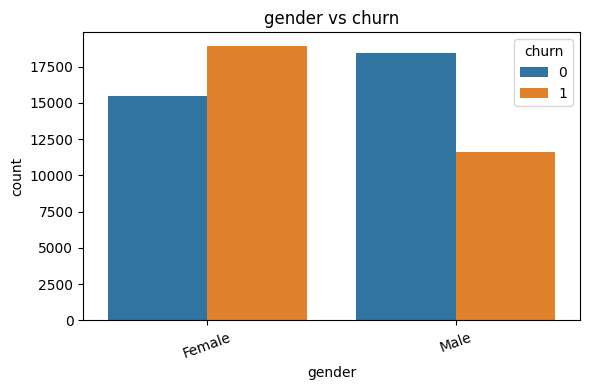


 Insight gender:
gender
Female    0.550490
Male      0.385797
Name: churn, dtype: float64
Pelanggan dengan kategori 'Female' memiliki tingkat churn tertinggi (0.55).


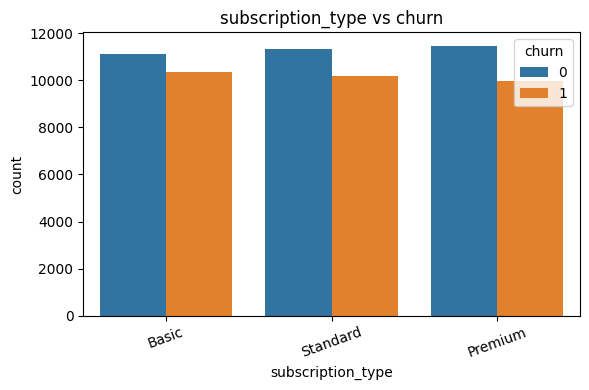


 Insight subscription_type:
subscription_type
Basic       0.482775
Standard    0.473305
Premium     0.464964
Name: churn, dtype: float64
Pelanggan dengan kategori 'Basic' memiliki tingkat churn tertinggi (0.48).


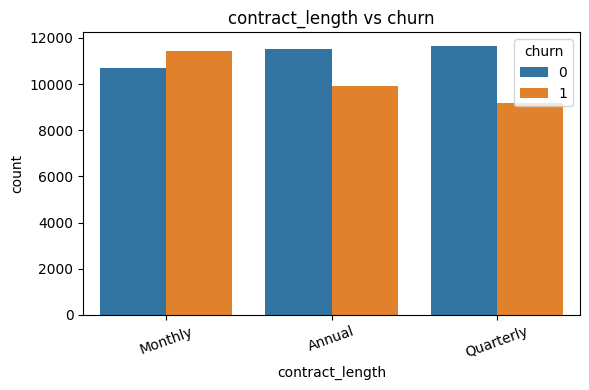


 Insight contract_length:
contract_length
Monthly      0.516087
Annual       0.462167
Quarterly    0.440482
Name: churn, dtype: float64
Pelanggan dengan kategori 'Monthly' memiliki tingkat churn tertinggi (0.52).

=== ANALISIS VARIABEL NUMERIK ===


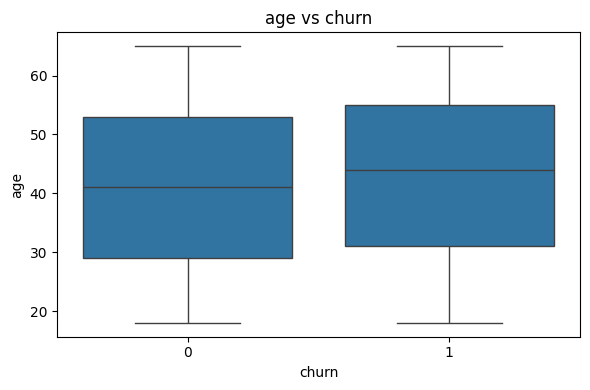


 Insight age:
Rata-rata pelanggan churn: 42.90
Rata-rata pelanggan tidak churn: 41.13
Nilai age lebih tinggi cenderung meningkatkan risiko churn.


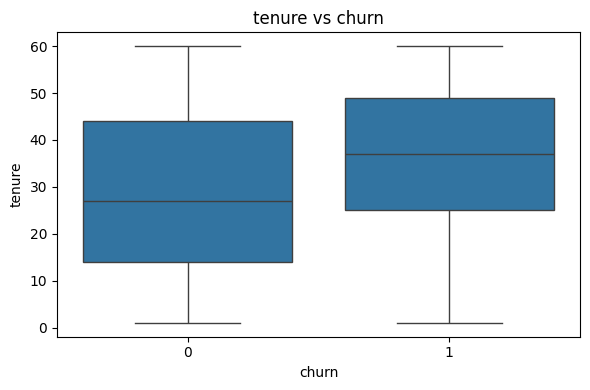


 Insight tenure:
Rata-rata pelanggan churn: 35.52
Rata-rata pelanggan tidak churn: 28.83
Nilai tenure lebih tinggi cenderung meningkatkan risiko churn.


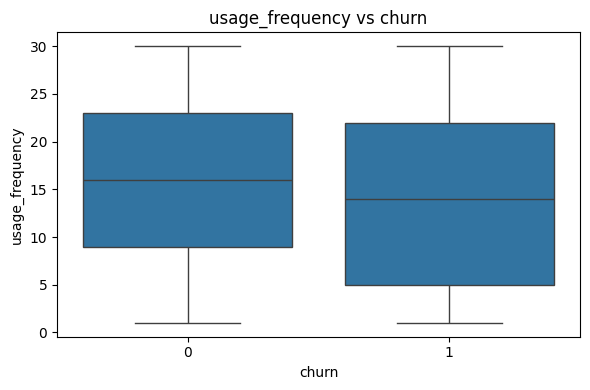


 Insight usage_frequency:
Rata-rata pelanggan churn: 14.01
Rata-rata pelanggan tidak churn: 16.04
Nilai usage_frequency lebih rendah cenderung meningkatkan risiko churn.


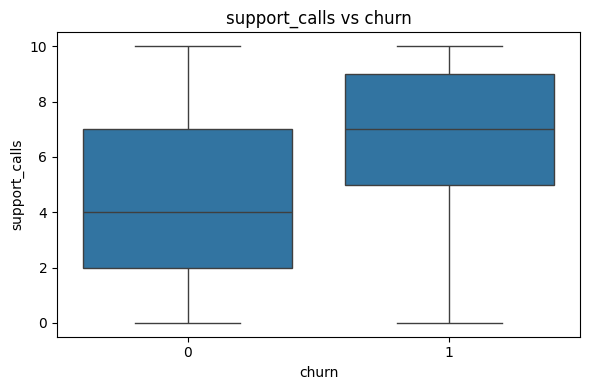


 Insight support_calls:
Rata-rata pelanggan churn: 6.40
Rata-rata pelanggan tidak churn: 4.50
Nilai support_calls lebih tinggi cenderung meningkatkan risiko churn.


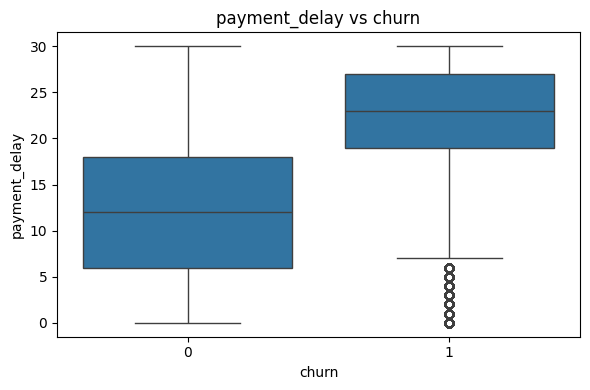


 Insight payment_delay:
Rata-rata pelanggan churn: 22.33
Rata-rata pelanggan tidak churn: 12.45
Nilai payment_delay lebih tinggi cenderung meningkatkan risiko churn.


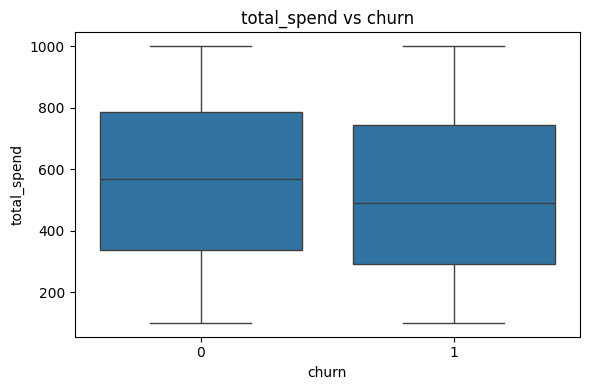


 Insight total_spend:
Rata-rata pelanggan churn: 519.34
Rata-rata pelanggan tidak churn: 560.54
Nilai total_spend lebih rendah cenderung meningkatkan risiko churn.


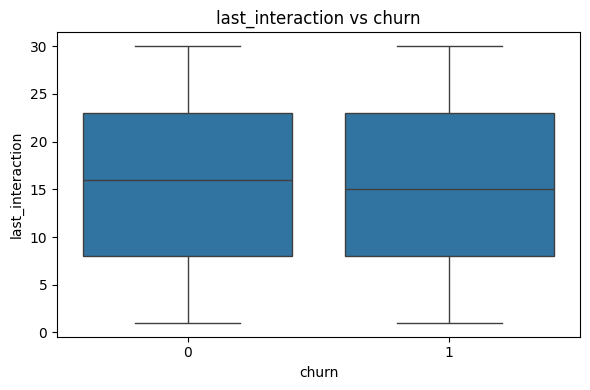


 Insight last_interaction:
Rata-rata pelanggan churn: 15.47
Rata-rata pelanggan tidak churn: 15.52
Nilai last_interaction lebih rendah cenderung meningkatkan risiko churn.


In [ ]:
churn_eda(df, target_col='churn')

## Assignment Feature Engineering
1. Perhatikan splitting
2. Serta beri alasan anda dalam melakukan proses feature engineering di setiap prosesnya

In [ ]:
# Encoding
# Using Label Encoder on Gender
# Female ------------------->  0
# Male ------------------->  1
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [ ]:
# Using one hot encoder on rest

# Select columns
cols_to_encode = ['subscription_type', 'contract_length']

# Initialize and fit
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = ohe.fit_transform(df[cols_to_encode])

# Get new column names
encoded_cols = ohe.get_feature_names_out(cols_to_encode)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop original columns & concat encoded ones
df = df.drop(columns=cols_to_encode)
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.head()

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,1,22,0,25,14,4,27,598,9,1,1.0,0.0,0.0,0.0,1.0,0.0
1,2,41,0,28,28,7,13,584,20,0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,47,1,27,10,2,29,757,21,0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,35,1,9,12,5,17,232,18,0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,53,0,58,24,9,2,533,18,0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  64374 non-null  int64  
 1   age                         64374 non-null  int64  
 2   gender                      64374 non-null  int64  
 3   tenure                      64374 non-null  int64  
 4   usage_frequency             64374 non-null  int64  
 5   support_calls               64374 non-null  int64  
 6   payment_delay               64374 non-null  int64  
 7   total_spend                 64374 non-null  int64  
 8   last_interaction            64374 non-null  int64  
 9   churn                       64374 non-null  int64  
 10  subscription_type_Basic     64374 non-null  float64
 11  subscription_type_Premium   64374 non-null  float64
 12  subscription_type_Standard  64374 non-null  float64
 13  contract_length_Annual      643

### Train/test split

In [ ]:
# Split the Data

X=df.drop(df[['churn','customerid']],axis=1)
Y=df['churn']

In [ ]:
print(X.shape,Y.shape)

(64374, 14) (64374,)


In [ ]:
# Training

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(51499, 14) (51499,)
(12875, 14) (12875,)


In [ ]:
# Feature scaling (mandatory for distance-based models & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Assignment Modelling
1. Gunakan Machine Learning Model dibawah ini :
- Logistic Regression
- KNN
- Decision tree
- SVM RBF
- Dengan ratio : class_weight = balanced #class_weight = pembobotan, (kecuali pada KNN)
2. Lakukan fitting dan Model evaluasi di tiap model, keluarkan nilai pada confusion matrix (akurasi, recall, presisi, f1-score). Fokuslah pada nilai recall untuk menentukan model terbaik (melihat pada selisih nilai evaluasi di train dengan test). Pilihlah metrics (akurasi / recall / dsb) yg tepat serta berikan alasannya.

Karena konteksnya adalah prediksi churn pelanggan, maka metrik recall lebih penting daripada akurasi.

Lebih berisiko jika sistem gagal mengenali pelanggan yang benar-benar akan churn (false negative) dibanding salah mendeteksi pelanggan yang sebenarnya tidak churn (false positive).

**Dengan kata lain:**
* Recall tinggi maka semakin banyak pelanggan yang benar-benar akan churn berhasil dideteksi.
* Ini berarti perusahaan bisa melakukan intervensi (diskon, promo, personalisasi) sebelum pelanggan benar-benar berhenti berlangganan.

In [ ]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, Y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

print("=== Logistic Regression (Train) ===")
print(classification_report(Y_train, y_pred_train))
print("Confusion Matrix (Train):")
print(confusion_matrix(Y_train, y_pred_train))

print("\n=== Logistic Regression (Test) ===")
print(classification_report(Y_test, y_pred_test))
print("Confusion Matrix (Test):")
print(confusion_matrix(Y_test, y_pred_test))


=== Logistic Regression (Train) ===
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     27088
           1       0.80      0.84      0.82     24411

    accuracy                           0.82     51499
   macro avg       0.82      0.82      0.82     51499
weighted avg       0.82      0.82      0.82     51499

Confusion Matrix (Train):
[[21908  5180]
 [ 3918 20493]]

=== Logistic Regression (Test) ===
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      6793
           1       0.81      0.84      0.83      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875

Confusion Matrix (Test):
[[5562 1231]
 [ 946 5136]]


**Logreg**

Recall (0.84) dan stabil antara train–test.

* True Positive (TP) = 5136 → Berhasil mendeteksi pelanggan yang benar-benar akan churn.

* False Positive (FP) = 1231 → Pelanggan salah deteksi, padahal tidak churn.

* True Negative (TN) = 5562 → Berhasil mendeteksi pelanggan yang memang tidak churn.

* False Negative (FN) = 946 → Pelanggan churn yang tidak terdeteksi oleh model.

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_scaled, Y_train)

y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

print("=== KNN (Train) ===")
print(classification_report(Y_train, y_pred_train))
print("Confusion Matrix (Train):")
print(confusion_matrix(Y_train, y_pred_train))

print("\n=== KNN (Test) ===")
print(classification_report(Y_test, y_pred_test))
print("Confusion Matrix (Test):")
print(confusion_matrix(Y_test, y_pred_test))


=== KNN (Train) ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     27088
           1       0.92      0.97      0.94     24411

    accuracy                           0.94     51499
   macro avg       0.94      0.95      0.94     51499
weighted avg       0.95      0.94      0.94     51499

Confusion Matrix (Train):
[[25078  2010]
 [  836 23575]]

=== KNN (Test) ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6793
           1       0.88      0.94      0.91      6082

    accuracy                           0.91     12875
   macro avg       0.91      0.91      0.91     12875
weighted avg       0.91      0.91      0.91     12875

Confusion Matrix (Test):
[[6021  772]
 [ 391 5691]]


**KNN**

sedikit penurunan train (0.97) dan test (0.94)

* True Positive (TP) = 5691 → Berhasil mendeteksi pelanggan yang benar-benar akan churn.

* False Positive (FP) = 772 → Pelanggan salah deteksi, padahal tidak churn.

* True Negative (TN) = 6021 → Berhasil mendeteksi pelanggan yang memang tidak churn.

* False Negative (FN) = 391 → Pelanggan churn yang tidak terdeteksi oleh model.

In [ ]:
# DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, Y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("=== Decision Tree (Train) ===")
print(classification_report(Y_train, y_pred_train))
print("Confusion Matrix (Train):")
print(confusion_matrix(Y_train, y_pred_train))

print("\n=== Decision Tree (Test) ===")
print(classification_report(Y_test, y_pred_test))
print("Confusion Matrix (Test):")
print(confusion_matrix(Y_test, y_pred_test))


=== Decision Tree (Train) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27088
           1       1.00      1.00      1.00     24411

    accuracy                           1.00     51499
   macro avg       1.00      1.00      1.00     51499
weighted avg       1.00      1.00      1.00     51499

Confusion Matrix (Train):
[[27088     0]
 [    0 24411]]

=== Decision Tree (Test) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

Confusion Matrix (Test):
[[6787    6]
 [   6 6076]]


Akurasi: 100%

Recall (churn): 1.00

Confusion Matrix: [[6787, 6], [6, 6076]]

TP = 6076, FP = 6, TN = 6787, FN = 6

Model Decision Tree menunjukkan hasil sempurna (100%) di train dan test, yang menandakan model kemungkinan besar overfitting — terlalu menghafal data latih, bukan belajar pola umum.

In [ ]:
# SVM
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_rbf.fit(X_train_scaled, Y_train)

y_pred_train = svm_rbf.predict(X_train_scaled)
y_pred_test = svm_rbf.predict(X_test_scaled)

print("=== SVM (RBF) (Train) ===")
print(classification_report(Y_train, y_pred_train))
print("Confusion Matrix (Train):")
print(confusion_matrix(Y_train, y_pred_train))

print("\n=== SVM (RBF) (Test) ===")
print(classification_report(Y_test, y_pred_test))
print("Confusion Matrix (Test):")
print(confusion_matrix(Y_test, y_pred_test))


=== SVM (RBF) (Train) ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     27088
           1       0.92      0.96      0.94     24411

    accuracy                           0.94     51499
   macro avg       0.94      0.94      0.94     51499
weighted avg       0.94      0.94      0.94     51499

Confusion Matrix (Train):
[[24972  2116]
 [  914 23497]]

=== SVM (RBF) (Test) ===
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6793
           1       0.92      0.96      0.94      6082

    accuracy                           0.94     12875
   macro avg       0.94      0.94      0.94     12875
weighted avg       0.94      0.94      0.94     12875

Confusion Matrix (Test):
[[6276  517]
 [ 273 5809]]


**SVM**

Recall bagus (0.96) dan stabil antara train–test.

* True Positive (TP) = 5809 → Berhasil mendeteksi pelanggan yang benar-benar akan churn.

* False Positive (FP) = 517 → Pelanggan salah deteksi, padahal tidak churn.

* True Negative (TN) = 6276 → Berhasil mendeteksi pelanggan yang memang tidak churn.

* False Negative (FN) = 273 → Pelanggan churn yang tidak terdeteksi oleh model.

Dari ke empat model yang sudah di gunakan **best model**nya adalah **SVM RBF**

**Alasannya:**

* Recall sangat tinggi (0.96) dan zero gap train–test.

* Stabil, akurat, dan generalisasi sangat baik.

* Recall tertinggi tanpa overfit

* Akurasi dan f1-score juga tinggi

* Generalisasi kuat terhadap data baru

### Assignment Profitable :
1. Lakukan perhitungan profitable dengan asumsi biaya yang anda buat sendiri.

In [ ]:
# Asumsi nilai ekonomi
profit_per_customer = 1_000_000    # keuntungan jika pelanggan berhasil dipertahankan
cost_per_campaign = 200_000         # biaya intervensi retensi per pelanggan


In [ ]:
# Confusion matrix dari hasil test tiap model
conf_matrices = {
    "SVM (RBF)": {"TP": 5809, "FP": 517},
}

In [ ]:
# Hitung profit tiap model
results = []
for model, vals in conf_matrices.items():
    TP = vals["TP"]
    FP = vals["FP"]
    revenue = TP * profit_per_customer
    cost = (TP + FP) * cost_per_campaign
    net_profit = revenue - cost
    results.append([model, TP, FP, revenue, cost, net_profit])


In [ ]:
# Buat dataframe hasil
df_profit = pd.DataFrame(results, columns=["Model", "TP", "FP", "Revenue", "Cost", "Net Profit"])


In [ ]:
df_profit["Revenue"] = df_profit["Revenue"].apply(lambda x: f"Rp {x:,.0f}")
df_profit["Cost"] = df_profit["Cost"].apply(lambda x: f"Rp {x:,.0f}")
df_profit["Net Profit"] = df_profit["Net Profit"].apply(lambda x: f"Rp {x:,.0f}")

print(df_profit)

       Model    TP   FP           Revenue              Cost        Net Profit
0  SVM (RBF)  5809  517  Rp 5,809,000,000  Rp 1,265,200,000  Rp 4,543,800,000


In [ ]:
df_profit

,Model,TP,FP,Revenue,Cost,Net Profit
0,SVM (RBF),5809,517,"Rp 5,809,000,000","Rp 1,265,200,000","Rp 4,543,800,000"


* SVM menghasilkan recall tinggi, banyak pelanggan berisiko churn berhasil diidentifikasi.

* Meskipun ada sedikit false positive, biaya tambahan relatif kecil dibanding potensi pendapatan.

* Model ini menghasilkan profit bersih yang signifikan, sehingga paling layak diimplementasikan dalam strategi retensi pelanggan.

* **Hitung Profit:**

**Pendapatan dari pelanggan yang berhasil dipertahankan:**
TP × Keuntungan = 5.809 × Rp 1.000.000 = Rp 5.809.000.000

**Biaya retensi (untuk semua pelanggan yang ditarget):**

(TP + FP) × Rp 200.000 = (5.809 + 517) × Rp 200.000 = Rp 1.265.200.000

**Total Profit Bersih:**

= Pendapatan – Biaya

= 5.809.000.000 – 1.265.200.000 = Rp 4.543.800.000

## Notes :
Kumpulkan di LMS link google collab yang sudah dibuka aksesnya + sudah di run dan save output codenya. Serta jangan di private